In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
iris = load_iris()   

In [64]:
features = iris.feature_names
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [65]:
X = iris.data
y = iris.target

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [67]:
iris = load_iris()
data = iris.data
feature_names = iris.feature_names
combinations = [
    ["sepal length (cm)", "sepal width (cm)", "petal length (cm)"],   # Combination 1
    ["petal length (cm)", "sepal width (cm)","petal width (cm)"],    # Combination 2
    ["sepal length (cm)", "petal width (cm)", "sepal width (cm)"],    # Combination 3
    ["sepal width (cm)", "petal length (cm)","sepal length (cm)"],   # Combination 4
]

def get_data(input_features, output_feature):
    input_indices = [feature_names.index(f) for f in input_features]
    output_index = feature_names.index(output_feature)
    X = data[:, input_indices]  # Input features
    y = data[:, output_index].reshape(-1, 1)  # Output feature
    return X, y

# Get the data for the first combination
input_features = combinations[0][:2] 
output_feature = combinations[0][2]
X, y = get_data(input_features, output_feature)
X_train_sepal_lw, X_test_sepal_lw, y_train_petal_l, y_test_petal_l = train_test_split(X, y, test_size=0.1, random_state=42)

# Get the data for the second combination
input_features = combinations[1][:2] 
output_feature = combinations[1][2]
X, y = get_data(input_features, output_feature)
X_train_pl_sw, X_test_pl_sw, y_train_petal_w, y_test_petal_w = train_test_split(X, y, test_size=0.1, random_state=42)

input_features = combinations[2][:2] 
output_feature = combinations[2][2]
X, y = get_data(input_features, output_feature)
X_train_sl_pw, X_test_sl_pw, y_train_sepal_w, y_test_sepal_w = train_test_split(X, y, test_size=0.1, random_state=42)

input_features = combinations[3][:2]
output_feature = combinations[3][2]
X, y = get_data(input_features, output_feature)
X_train_sw_pl, X_test_sw_pl, y_train_sepal_l, y_test_sepal_l = train_test_split(X, y, test_size=0.1, random_state=42)

#Data For Multiple Linear Regression
X, y = data[:, [0,1]] , data[:, [2,3]]
X_train_s_w_l, X_test_s_w_l, y_train_p_l_w, y_test_p_l_w = train_test_split(X, y, test_size=0.1, random_state=42)


In [68]:
import numpy as np

class LinearRegression():
    def __init__(self):
        self.weights = None
        self.bias = None
        self.history = []

    def fit(self, X, y, batch_size=32, max_epochs=100, learning_rate=0.01 , patience=3):
        self.batch_size = batch_size
        self.max_epochs = max_epochs
        self.weights = None
        self.bias = None
        best_val_loss = np.inf
        patience_counter = 0
        y = y.reshape(-1, 1) 
        n_sample,n_features = X.shape
        self.weights = np.random.randn(n_features, 1) * 0.01  # Shape: (2,1)
        self.bias = np.zeros((1, 1))
        # we divide our training data to traning and validation
        split_index = int(0.9 *  n_sample)
        X_train , X_val = X[:split_index] , X[split_index:]
        y_train , y_val = y[:split_index] , y[split_index:]
        
        for epoch in range(max_epochs):
            error = 0
            for i in range(0, X.shape[0], batch_size):
                batch_X = X_train[i:i + batch_size]
                batch_y = y_train[i:i + batch_size]
                if batch_X.shape[0] == 0:
                    continue  # Skip if the batch size is 0
                y_pred = np.dot(batch_X, self.weights) + self.bias
                error = y_pred - batch_y
                
                
                batch_loss = np.mean(error**2)
                self.history.append(batch_loss) 

                dw = (2 / batch_X.shape[0]) * np.dot(batch_X.T, error)
                db = (2 / batch_X.shape[0]) * np.sum(error)
                self.weights -= learning_rate * dw
                self.bias -= learning_rate * db
                
              
            y_val_pred = np.dot(X_val, self.weights) + self.bias
            val_loss = np.mean((y_val_pred - y_val)**2)
                
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= patience:
                    print(f"Early stopping at epoch {epoch+1}")
                    break    


    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

    def score(self, yt, ypred):
        mse = np.mean((yt - ypred) ** 2)
        return mse

    def fitL2(self, X, y, batch_size=32, max_epochs=100, regularization=0.1 , learning_rate=0.01):
        self.batch_size = batch_size
        self.max_epochs = max_epochs
        self.weights = None
        self.bias = None
        best_val_loss = np.inf
        patience_counter = 0
        y = y.reshape(-1, 1) 
        n_sample,n_features = X.shape
        self.weights = np.random.randn(n_features, 1) * 0.01  # Shape: (2,1)
        self.bias = np.zeros((1, 1))
        
        # we divide our training data to traning and validation
        split_index = int(0.9 *  n_sample)
        X_train , X_val = X[:split_index] , X[split_index:]
        y_train , y_val = y[:split_index] , y[split_index:]
        
        for epoch in range(max_epochs):
            error = 0
            for i in range(0, X.shape[0], batch_size):
                batch_X = X_train[i:i + batch_size]
                batch_y = y_train[i:i + batch_size]
                if batch_X.shape[0] == 0:
                    continue  # Skip if the batch size is 0
                y_pred = np.dot(batch_X, self.weights) + self.bias
                error = y_pred - batch_y
                
                
                batch_loss = np.mean(error**2)
                self.history.append(batch_loss) 

                dw = (2 / batch_X.shape[0]) * np.dot(batch_X.T, error) + (2 * regularization * self.weights)
                db = (2 / batch_X.shape[0]) * np.sum(error)
                self.weights -= learning_rate * dw
                self.bias -= learning_rate * db
                
              
            y_val_pred = np.dot(X_val, self.weights) + self.bias
            val_loss = np.mean((y_val_pred - y_val)**2)
                
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= patience:
                    print(f"Early stopping at epoch {epoch+1}")
                    break    




Training model 1 with sepal length and width to predict Petal width

In [69]:
model1 = LinearRegression ()
X_train_sepal_lw = np.nan_to_num(X_train_sepal_lw)
y_train_petal_l = np.nan_to_num(y_train_petal_l)
model1.fit(X_train_sepal_lw, y_train_petal_l, 32, 100)

Early stopping at epoch 95


MSE:  4.716339332423353


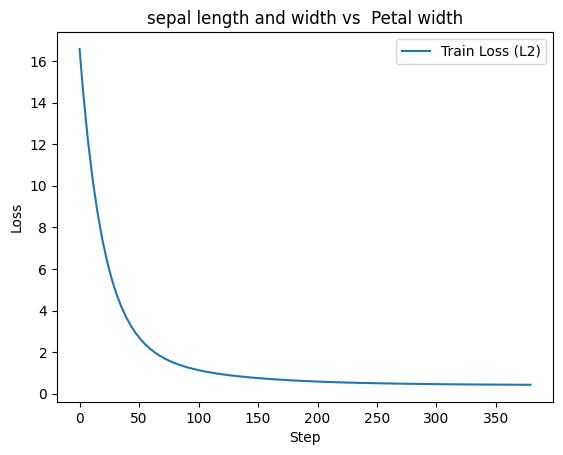

In [70]:
X_test_sepal_lw = np.nan_to_num(X_test_sepal_lw)
pred1 = model1.predict(X_test_sepal_lw)
y_test_sepal_l = np.nan_to_num(y_test_sepal_l)
mse1 = model1.score(y_test_sepal_l, pred1)
print("MSE: ",mse1)
alpha = 0.05  # Smoothing factor
smoothed_loss = np.zeros(len(model1.history))
smoothed_loss[0] = model1.history[0]
for i in range(1, len(model1.history)):
    smoothed_loss[i] = alpha * model1.history[i] + (1 - alpha) * smoothed_loss[i - 1]

# Plot smoothed loss
plt.plot(smoothed_loss ,label='Train Loss (L2)')
plt.title('sepal length and width vs  Petal width')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.legend()
plt.show()

Training model 2 with Petal length & Sepal width to predict Petal width

In [71]:
model2 = LinearRegression ()
model2.fit(X_train_pl_sw, y_train_petal_w, 32, 100)

Early stopping at epoch 21


MSE:  0.05262217013766835


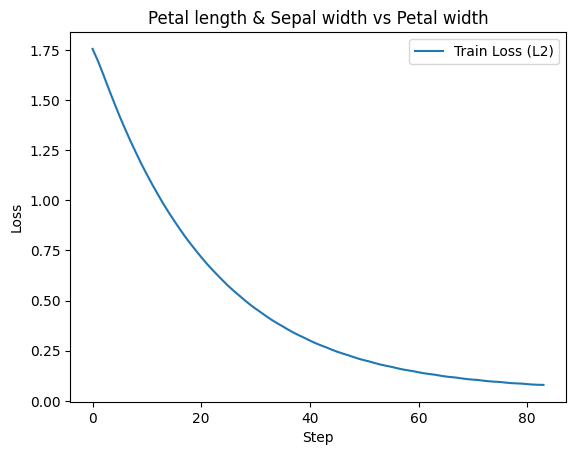

In [72]:
pred2 = model2.predict(X_test_pl_sw)
mse2 = model2.score(y_test_petal_w, pred2)
print("MSE: ",mse2)
alpha = 0.05  # Smoothing factor
smoothed_loss = np.zeros(len(model2.history))
smoothed_loss[0] = model2.history[0]
for i in range(1, len(model2.history)):
    smoothed_loss[i] = alpha * model2.history[i] + (1 - alpha) * smoothed_loss[i - 1]

# Plot smoothed loss
plt.plot(smoothed_loss,label='Train Loss (L2)')
plt.title('Petal length & Sepal width vs Petal width')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.legend()
plt.show()

Training model 3 with Sepal length & Petal width to predict Sepal width

In [73]:
model3 = LinearRegression ()
X_train_sl_pw = np.nan_to_num(X_train_sl_pw)
y_train_sepal_w = np.nan_to_num(y_train_sepal_w)
model3.fit(X_train_sl_pw, y_train_sepal_w, 32, 100)

Early stopping at epoch 69


0.18518748652522218


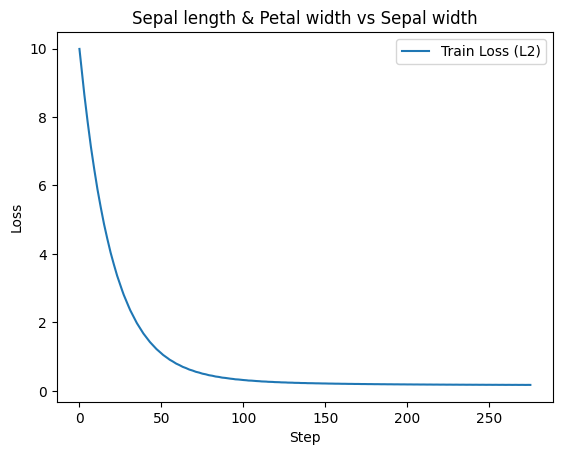

In [74]:
X_test_sl_pw = np.nan_to_num(X_test_sl_pw)
y_test_sepal_w = np.nan_to_num(y_test_sepal_w)
pred3 = model3.predict(X_test_sl_pw)
mse3= model3.score(y_test_sepal_w, pred3)
print(mse3)
alpha = 0.05  # Smoothing factor
smoothed_loss = np.zeros(len(model3.history))
smoothed_loss[0] = model3.history[0]
for i in range(1, len(model3.history)):
    smoothed_loss[i] = alpha * model3.history[i] + (1 - alpha) * smoothed_loss[i - 1]

# Plot smoothed loss
plt.plot(smoothed_loss,label='Train Loss (L2)')
plt.title('Sepal length & Petal width vs Sepal width')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.legend()
plt.show()

Training model 4 with Sepal width & petal length to predict sepal length

In [75]:
X_train_sw_pl = np.nan_to_num(X_train_sw_pl)
X_train_sepal_l = np.nan_to_num(y_train_sepal_l)
model4 = LinearRegression ()
model4.fit(X_train_sw_pl, X_train_sepal_l, 32, 100)

0.1858905737229049


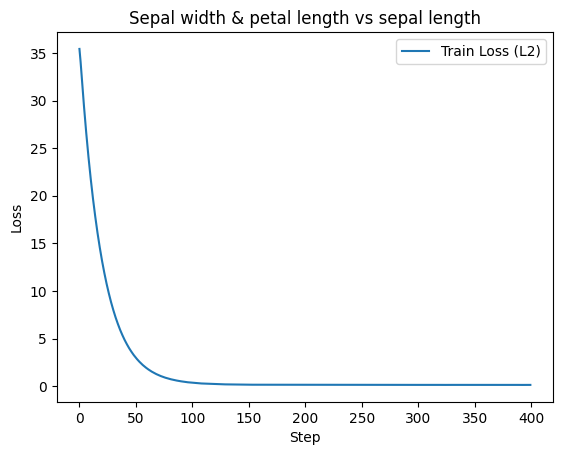

In [76]:
X_test_sw_pl = np.nan_to_num(X_test_sw_pl)
pred4 = model4.predict(X_test_sw_pl)
y_test_sepal_l = np.nan_to_num(y_test_sepal_l)
mse4 = model4.score(y_test_sepal_l, pred4)
print(mse4)
alpha = 0.05  # Smoothing factor
smoothed_loss = np.zeros(len(model4.history))
smoothed_loss[0] = model4.history[0]
for i in range(1, len(model4.history)):
    smoothed_loss[i] = alpha * model4.history[i] + (1 - alpha) * smoothed_loss[i - 1]

# Plot smoothed loss
plt.plot(smoothed_loss,label='Train Loss (L2)')
plt.title('Sepal width & petal length vs sepal length')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.legend()
plt.show()

Applying  L2 Regularization to the First Model And Checking Parameter diffrence

In [77]:
model5 = LinearRegression ()
X_train_sepal_lw = np.nan_to_num(X_train_sepal_lw)
y_train_petal_l = np.nan_to_num(y_train_petal_l)
model5.fitL2(X_train_sepal_lw, y_train_petal_l, 100)

MSE:  3.9698820319246337


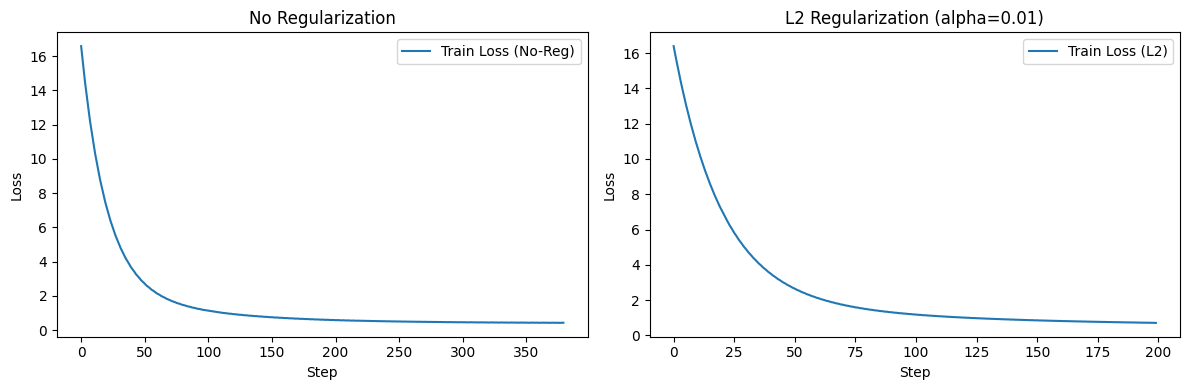

In [78]:
X_test_sepal_lw = np.nan_to_num(X_test_sepal_lw)
pred1 = model5.predict(X_test_sepal_lw)
y_test_sepal_l = np.nan_to_num(y_test_sepal_l)
mse1 = model5.score(y_test_sepal_l, pred1)
print("MSE: ",mse1)
alpha = 0.05  # Smoothing factor
smoothed_loss = np.zeros(len(model5.history))
smoothed_loss[0] = model5.history[0]
for i in range(1, len(model5.history)):
    smoothed_loss[i] = alpha * model5.history[i] + (1 - alpha) * smoothed_loss[i - 1]

smoothed_loss2 = np.zeros(len(model1.history))
smoothed_loss2[0] = model1.history[0]
for i in range(1, len(model1.history)):
    smoothed_loss2[i] = alpha * model1.history[i] + (1 - alpha) * smoothed_loss2[i - 1]
# Plot smoothed loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(smoothed_loss2, label='Train Loss (No-Reg)')
plt.title('No Regularization')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(smoothed_loss, label='Train Loss (L2)')

plt.title('L2 Regularization (alpha=0.01)')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()




Regression with Multiple Outputs

In [79]:
import numpy as np

class LinearRegressionWithMultipalOutput():
    def __init__(self):
        self.weights = None
        self.bias = None
        self.history = []

    def fit(self, X, y, batch_size=32, max_epochs=100, learning_rate=0.01 , patience=3):
        self.batch_size = batch_size
        self.max_epochs = max_epochs
        self.weights = None
        self.bias = None
        best_val_loss = np.inf
        patience_counter = 0
        n_sample,n_features = X.shape
        self.weights = np.random.randn(n_features, 2) * 0.01  
        self.bias = np.zeros((1, 2))
        
        # we divide our training data to traning and validation
        split_index = int(0.9 *  n_sample)
        X_train , X_val = X[:split_index] , X[split_index:]
        y_train , y_val = y[:split_index] , y[split_index:]
        
        for epoch in range(max_epochs):
            error = 0
            for i in range(0, X.shape[0], batch_size):
                batch_X = X_train[i:i + batch_size]
                batch_y = y_train[i:i + batch_size]
                if batch_X.shape[0] == 0:
                    continue  # Skip if the batch size is 0
                y_pred = np.dot(batch_X, self.weights) + self.bias
                error = y_pred - batch_y
                
                
                batch_loss = np.mean(error**2)
                self.history.append(batch_loss) 

                dw = (2 / batch_X.shape[0]) * np.dot(batch_X.T, error)
                db = (2 / batch_X.shape[0]) * np.sum(error)
                self.weights -= learning_rate * dw
                self.bias -= learning_rate * db
                
              
            y_val_pred = np.dot(X_val, self.weights) + self.bias
            val_loss = np.mean((y_val_pred - y_val)**2)
                
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= patience:
                    print(f"Early stopping at epoch {epoch+1}")
                    break    


    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

    def score(self, yt, ypred):
        mse = np.mean((yt - ypred) ** 2)
        return mse

In [80]:
model10 = LinearRegressionWithMultipalOutput ()
X_train_s_w_l = np.nan_to_num(X_train_s_w_l)
y_train_p_l_w = np.nan_to_num(y_train_p_l_w)
model10.fit(X_train_s_w_l, y_train_p_l_w, 32, 100)

Early stopping at epoch 85


0.35076023004832657
weight (2, 2)
bias [[-0.44582696 -0.44582696]]
weight (2, 1)
bias [[0.30501136]]


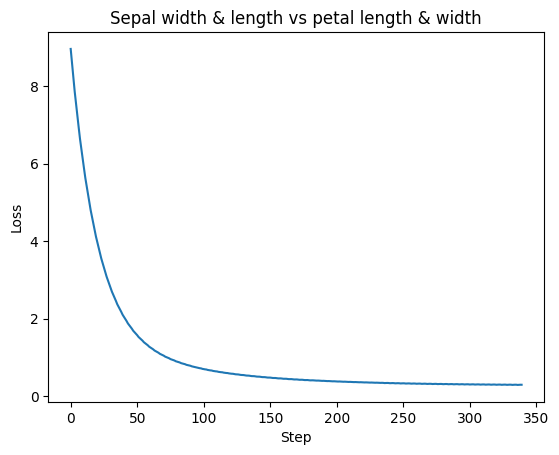

In [81]:
X_test_s_w_l = np.nan_to_num(X_test_s_w_l)
pred10 = model10.predict(X_test_s_w_l)
y_test_p_l_w = np.nan_to_num(y_test_p_l_w)
mse10 = model10.score(y_test_p_l_w, pred10)
print(mse10)
alpha = 0.05  # Smoothing factor
smoothed_loss = np.zeros(len(model10.history))
smoothed_loss[0] = model10.history[0]
for i in range(1, len(model10.history)):
    smoothed_loss[i] = alpha * model10.history[i] + (1 - alpha) * smoothed_loss[i - 1]

# Plot smoothed loss
print("weight",model10.weights.shape)
print("bias",model10.bias)
print("weight",model3.weights.shape)
print("bias",model3.bias)
plt.plot(smoothed_loss)
plt.title('Sepal width & length vs petal length & width')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.show()
